# Simple Linear Regression

## Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np

#Loading the dataset
df = pd.read_csv('C:/Users/Arati/Desktop/Spark/T 1/student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
df.shape

(25, 2)

## Data Analysis

In [3]:
#Viewing statistical information
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

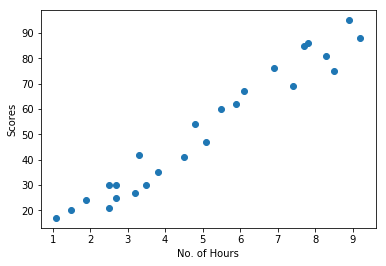

In [13]:
import matplotlib.pyplot as plt

#plotting a scatterplot

plt.scatter(df.Hours, df.Scores)
plt.xlabel('No. of Hours')
plt.ylabel('Scores')

From the scatter plot it can be observed that there is a positive correlation between the No. of hours studied and the scores obtained by the student.

## Preparing data for Model

In [5]:
#Feature and target variables
X = df.Hours
y = df.Scores

In [6]:
#Splitting data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Model Training

In [8]:
#Model training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#Accuracy
lr.score(X_test, y_test)

0.9141704756877036

## Model Evaluation

Text(0, 0.5, 'Scores')

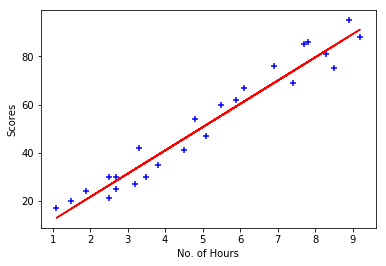

In [10]:
#Plotting results

plt.scatter(df.Hours, df.Scores, marker = '+', color = 'blue')
plt.plot(df.Hours, lr.predict(df[['Hours']]), color = 'red')  #plotting the line of best fit
plt.xlabel('No. of Hours')
plt.ylabel('Scores')

In [11]:
#Model evluation

from sklearn import metrics

predictions = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.339467147056044
MSE: 43.03149030921291
RMSE: 6.5598391984265065


## Making predictions

In [12]:
#Making predictions using trained model

inp = float(input("Enter hours studied: "))
y_pred = lr.predict([[inp]])
s = str(y_pred)
print("Predicted Score: {}" .format(s[2:-2]))

Enter hours studied: 8.5
Predicted Score: 84.40633355
